In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/average-global-iq-per-country-with-other-stats/iq_classification.csv
/kaggle/input/average-global-iq-per-country-with-other-stats/avgIQpercountry.csv


In [13]:
df = pd.read_csv("/kaggle/input/average-global-iq-per-country-with-other-stats/avgIQpercountry.csv", sep = ",")
df.head()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352


In [14]:
df.shape

(193, 10)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isna().sum()

Rank                               0
Country                            0
Average IQ                         0
Continent                          0
Literacy Rate                      0
Nobel Prices                       0
HDI (2021)                        14
Mean years of schooling - 2021    14
 GNI - 2021                       14
Population - 2023                  0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.head()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352
5,6,South Korea,102.35,Asia,0.98,0,0.925,12.5,44501.0,51784059


In [19]:
df.isna().sum()

Rank                              0
Country                           0
Average IQ                        0
Continent                         0
Literacy Rate                     0
Nobel Prices                      0
HDI (2021)                        0
Mean years of schooling - 2021    0
 GNI - 2021                       0
Population - 2023                 0
dtype: int64

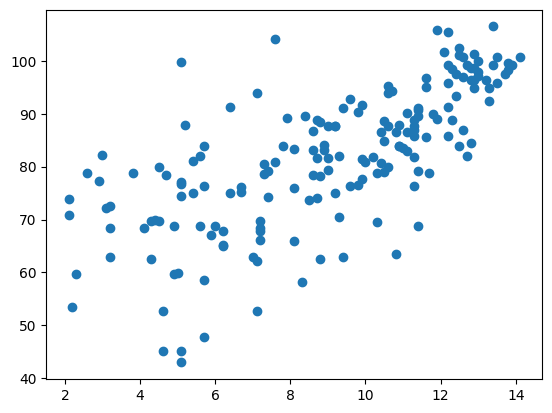

In [20]:
# Analyzing the correlation between average IQ and mean years of schooling.

plt.scatter(df["Mean years of schooling - 2021"].values, df["Average IQ"].values)

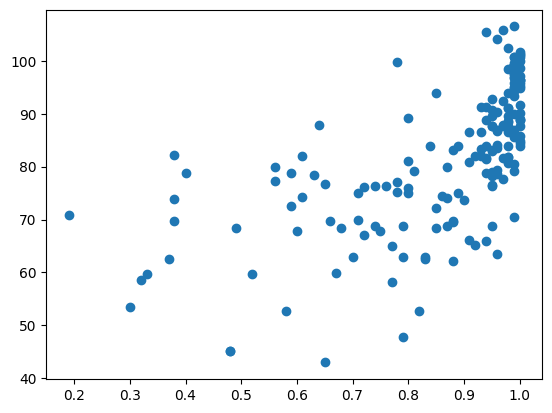

In [21]:
plt.scatter(df["Literacy Rate"].values, df["Average IQ"].values)

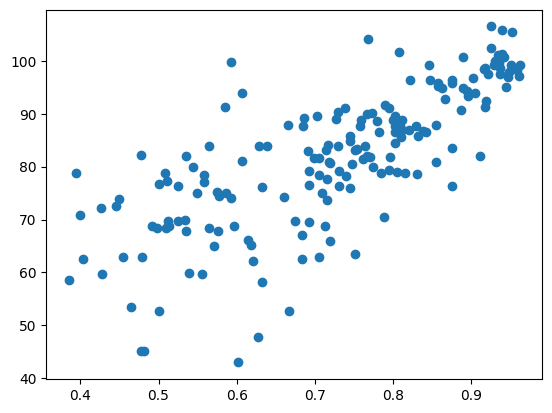

In [22]:
plt.scatter(df["HDI (2021)"].values, df["Average IQ"].values)

In [23]:
df_ajusted = df.drop("Country", axis = 1)
df_ajusted = df_ajusted.drop("Rank", axis = 1)
df_ajusted = df_ajusted.drop("Continent", axis = 1)

df_ajusted.head()

,Average IQ,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,106.48,0.99,29,0.925,13.4,42274.0,123294513
2,105.89,0.97,0,0.939,11.9,90919.0,6014723
3,105.37,0.94,1,0.952,12.2,62607.0,7491609
4,104.10,0.96,8,0.768,7.6,17504.0,1425671352
5,102.35,0.98,0,0.925,12.5,44501.0,51784059


In [24]:
correlation = df_ajusted.corr()

<Axes: >

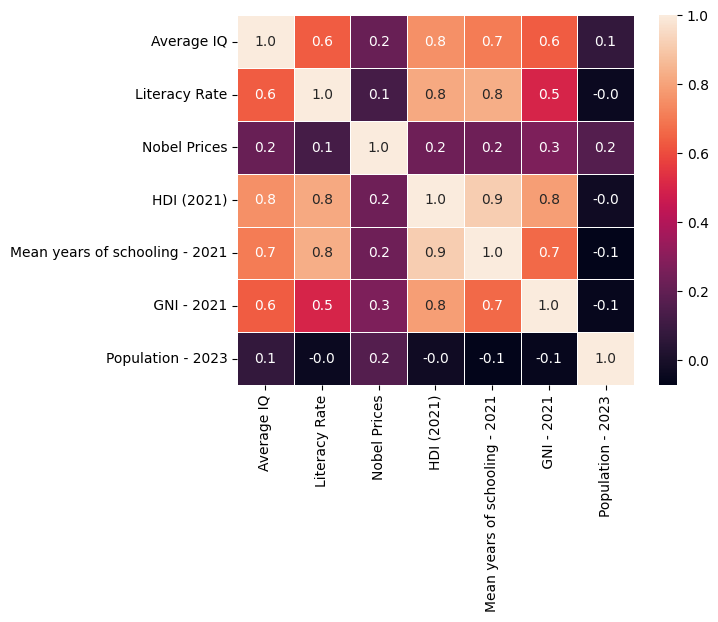

In [25]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [26]:
df_continental = df.drop("Country", axis = 1)
df_continental = df_continental.drop("Rank", axis = 1)
df_continental = df_continental.drop("Population - 2023", axis = 1)
df_continental = df_continental.groupby(["Continent"]).mean()
df_continental.head()

,Average IQ,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021
Continent,,,,,,
Africa,68.793469,0.676327,0.530612,0.557857,5.806122,5343.591837
Asia,84.886591,0.894091,1.704545,0.740091,9.125000,22114.704545
Central America,73.810000,0.907895,0.315789,0.728579,9.031579,13194.210526
Europe,94.904878,0.988293,13.975610,0.881146,12.195122,42384.463415
Europe/Asia,89.196667,0.986667,0.666667,0.820667,11.400000,24287.666667


In [27]:
df_continental["Average IQ"].sort_values(ascending = False)

Continent
Europe             94.904878
North America      94.893333
Europe/Asia        89.196667
Oceania            88.257500
Asia               84.886591
South America      83.783333
Central America    73.810000
Africa             68.793469
Name: Average IQ, dtype: float64